In [6]:
import pandas as pd 
import numpy as np 
import pandas_profiling
import matplotlib.pyplot as plt
import cpi

In [7]:
data = 'clean_df.csv'
clean_df = pd.read_csv(data)
clean_df.head()

,Unnamed: 0,EVENT_ID,STATE,YEAR,MONTH_NAME,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,MAGNITUDE,DATA_SOURCE,property_money_identifier,crops_money_identifier
0,0,10096222,OKLAHOMA,1950,April,Tornado,0,0,0,0,250000.0,0.0,0.0,PUB,1000,1
1,1,10120412,TEXAS,1950,April,Tornado,0,0,0,0,25000.0,0.0,0.0,PUB,1000,1
2,2,10104927,PENNSYLVANIA,1950,July,Tornado,2,0,0,0,25000.0,0.0,0.0,PUB,1000,1
3,3,10104928,PENNSYLVANIA,1950,July,Tornado,0,0,0,0,2500.0,0.0,0.0,PUB,1000,1
4,4,10104929,PENNSYLVANIA,1950,July,Tornado,0,0,0,0,2500.0,0.0,0.0,PUB,1000,1


In [8]:
year_df = clean_df.groupby('YEAR')
#year_df.head()
year_events = year_df['EVENT_TYPE'].count()
year_ttl_dmg = year_df['DAMAGE_PROPERTY'].sum()
year_ttl_dmg

YEAR
1950    3.448165e+07
1951    6.550599e+07
1952    9.430224e+07
1953    5.961047e+08
1954    8.580532e+07
            ...     
2015    4.446679e+09
2016    1.821901e+10
2017    8.040249e+10
2018    2.990562e+10
2019    6.243334e+09
Name: DAMAGE_PROPERTY, Length: 70, dtype: float64

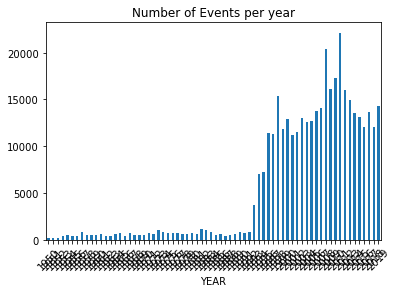

In [9]:
event_chart = year_events.plot(kind='bar', title="Number of Events per year",)
plt.xticks(rotation=45)

plt.show()

In [10]:
#year_avg_dmg= pd.DataFrame(year_avg_dmg)
#year_avg_dmg.profile_report()

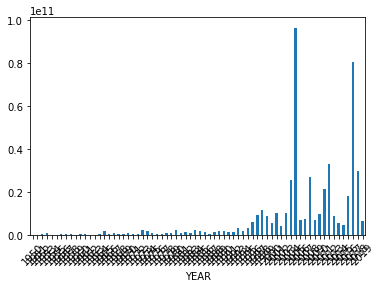

In [11]:
ttl_dmg_chart = year_ttl_dmg.plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

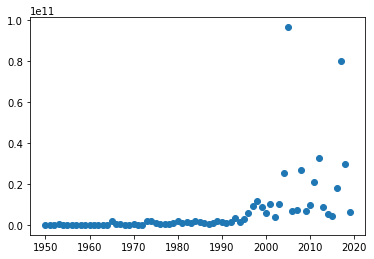

In [12]:

y_axis = year_df['DAMAGE_PROPERTY'].sum()
x_axis = year_df['YEAR'].unique()
plt.scatter(x_axis,y_axis)
plt.show()

In [13]:
clean_df['EVENT_TYPE'].value_counts()

Thunderstorm Wind               174474
Tornado                          44592
Flash Flood                      32126
Hail                             31713
Flood                            17643
Strong Wind                      17177
High Wind                        15751
Lightning                        11633
Winter Storm                      7403
Drought                           4258
Heavy Snow                        3986
Winter Weather                    3353
Ice Storm                         3240
Tropical Storm                    1961
Wildfire                          1723
Heavy Rain                        1464
Blizzard                          1376
Hurricane (Typhoon)                996
Frost/Freeze                       993
Lake-Effect Snow                   931
Cold/Wind Chill                    670
Coastal Flood                      649
Storm Surge/Tide                   506
Debris Flow                        318
Dense Fog                          209
Extreme Cold/Wind Chill  

In [14]:
no_thunderstom_X = clean_df.replace({'THUNDERSTORM WINDS LIGHTNING':"Thunderstorm",'THUNDERSTORM WINDS/FLOODING':"Thunderstorm",'THUNDERSTORM WINDS/ FLOOD':"Thunderstorm",'Thunderstorm Wind':"Thunderstorm",'Marine Thunderstorm Wind':"Thunderstorm",'Lightning':"Thunderstorm",'Marine Hail': "Thunderstorm",'THUNDERSTORM WIND/ TREE ':"Thunderstorm"})
no_thunderstom_X["EVENT_TYPE"].value_counts()

Thunderstorm                  186273
Tornado                        44592
Flash Flood                    32126
Hail                           31713
Flood                          17643
Strong Wind                    17177
High Wind                      15751
Winter Storm                    7403
Drought                         4258
Heavy Snow                      3986
Winter Weather                  3353
Ice Storm                       3240
Tropical Storm                  1961
Wildfire                        1723
Heavy Rain                      1464
Blizzard                        1376
Hurricane (Typhoon)              996
Frost/Freeze                     993
Lake-Effect Snow                 931
Cold/Wind Chill                  670
Coastal Flood                    649
Storm Surge/Tide                 506
Debris Flow                      318
Dense Fog                        209
Extreme Cold/Wind Chill          200
Tropical Depression              170
Dust Storm                       156
D

In [15]:
ttwh_df = clean_df.loc[clean_df['EVENT_TYPE'] == 'Tornado','Thunderstorm Wind','Hail']
#all_events_df = clean_df.loc[clean_df['EVENT_TYPE'] != 'Tornado','Thunderstorm Wind','Hail']
ttwh_df['EVENT_TYPE'].value_counts()

IndexingError: Too many indexers

In [25]:
array = ['Tornado','Thunderstorm','Hail']
ttwh_df = no_thunderstom_X.loc[no_thunderstom_X['EVENT_TYPE'].isin(array)]
ninety_six_df = no_thunderstom_X.loc[no_thunderstom_X['EVENT_TYPE'].isin(array) == False]
ttwh_df.head()

,Unnamed: 0,EVENT_ID,STATE,YEAR,MONTH_NAME,EVENT_TYPE,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS,MAGNITUDE,DATA_SOURCE,property_money_identifier,crops_money_identifier
0,0,10096222,OKLAHOMA,1950,April,Tornado,0,0,0,0,250000.0,0.0,0.0,PUB,1000,1
1,1,10120412,TEXAS,1950,April,Tornado,0,0,0,0,25000.0,0.0,0.0,PUB,1000,1
2,2,10104927,PENNSYLVANIA,1950,July,Tornado,2,0,0,0,25000.0,0.0,0.0,PUB,1000,1
3,3,10104928,PENNSYLVANIA,1950,July,Tornado,0,0,0,0,2500.0,0.0,0.0,PUB,1000,1
4,4,10104929,PENNSYLVANIA,1950,July,Tornado,0,0,0,0,2500.0,0.0,0.0,PUB,1000,1


In [17]:
years_df = ttwh_df.groupby('YEAR')
#year_df.head()
years_events = years_df['EVENT_TYPE'].count()
years_ttl_dmg = years_df['DAMAGE_PROPERTY'].sum()
years_ttl_dmg

YEAR
1950    3.448165e+07
1951    6.550599e+07
1952    9.430224e+07
1953    5.961047e+08
1954    8.580532e+07
            ...     
2015    1.172718e+09
2016    3.866278e+09
2017    3.508485e+09
2018    1.548634e+09
2019    3.482174e+09
Name: DAMAGE_PROPERTY, Length: 70, dtype: float64

In [18]:
CPI = 'CPIdata1950-2020.csv'
CPI_df = pd.read_csv(CPI)
CPI_df.head()


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2
0,1950,23.5,23.5,23.6,23.6,23.7,23.8,24.1,24.3,24.4,24.6,24.7,25.0,24.1,NaN,NaN
1,1951,25.4,25.7,25.8,25.8,25.9,25.9,25.9,25.9,26.1,26.2,26.4,26.5,26.0,NaN,NaN
2,1952,26.5,26.3,26.3,26.4,26.4,26.5,26.7,26.7,26.7,26.7,26.7,26.7,26.5,NaN,NaN
3,1953,26.6,26.5,26.6,26.6,26.7,26.8,26.8,26.9,26.9,27.0,26.9,26.9,26.7,NaN,NaN
4,1954,26.9,26.9,26.9,26.8,26.9,26.9,26.9,26.9,26.8,26.8,26.8,26.7,26.9,NaN,NaN


In [19]:
y_axis = ttwh_df['DAMAGE_PROPERTY'].sum()
x_axis = ttwh_df['YEAR'].unique()
plt.scatter(x_axis,y_axis)
plt.show()

ValueError: x and y must be the same size

In [20]:
#events_chart = years_events.plot(kind='bar', title="Number of Events per year",)
#plt.xticks(rotation=45)

#plt.show()

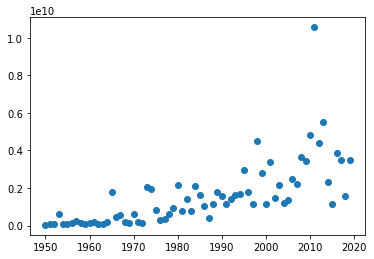

In [21]:
y_axis = years_df['DAMAGE_PROPERTY'].sum()
x_axis = ttwh_df['YEAR'].unique()
plt.scatter(x_axis,y_axis)
plt.show()



In [24]:
ttwh_df['DAMAGE_PROPERTY'] =ttwh_df.apply(lambda x: cpi.inflate(x.DAMAGE_PROPERTY, x.YEAR), axis=1)
df.head()

CPIObjectDoesNotExist: Index of annual type for 2019-01-01 does not exist